In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split

In [2]:
data_path = "./Dataset/Train"
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]
classes = len(categories)

w = 224
h = 224

x = []
t = []
count = 100

for i, j in enumerate(categories):
    
    # One-hot Encoding
    label = [0 for k in range(classes)]
    label[i] = 1
    
    img_path = data_path + "/" + j
    files = glob.glob(img_path + "/*.jpg")[:count]
    print(j, "파일 길이 : ", len(files))
    
    # 이미지 전처리
    for k, f in enumerate(files):
  
        img = Image.open(f)
        img = img.convert("RGB")   # RGB 채널로 변환
        img = img.resize((w, h))   # 이미지 크기 조정
        data = np.asarray(img)   # numpy 배열로 변환
        x.append(data)
        t.append(label)
          
x = np.array(x)
t = np.array(t)

print('데이터 준비 및 전처리 완료!')

A 파일 길이 :  100
B 파일 길이 :  100
C 파일 길이 :  100
D 파일 길이 :  100
E 파일 길이 :  100
F 파일 길이 :  100
G 파일 길이 :  100
H 파일 길이 :  100
I 파일 길이 :  100
J 파일 길이 :  100
K 파일 길이 :  100
L 파일 길이 :  100
M 파일 길이 :  100
N 파일 길이 :  100
O 파일 길이 :  100
P 파일 길이 :  100
Q 파일 길이 :  100
R 파일 길이 :  100
S 파일 길이 :  100
T 파일 길이 :  100
U 파일 길이 :  100
V 파일 길이 :  100
W 파일 길이 :  100
X 파일 길이 :  100
Y 파일 길이 :  100
Z 파일 길이 :  100
Nothing 파일 길이 :  100
Space 파일 길이 :  100
데이터 준비 및 전처리 완료!


In [3]:
print(type(x))
print(type(t))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
x_train, x_test, t_train, t_test = train_test_split(x, t)
dataset_numpy = (x_train, x_test, t_train, t_test)

In [5]:
# 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(2100, 224, 224, 3)
(2100, 28)
(700, 224, 224, 3)
(700, 28)


In [7]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [8]:
# 추가적인 레이어 생성
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(28, activation='softmax')(x)

In [9]:
# 전체 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [11]:
# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [12]:
# 모델 학습
model.fit(x_train, t_train, batch_size=32, epochs=10, validation_data=(x_test, t_test), callbacks=[early_stopping])

Epoch 1/10
66/66 [==============================] - 722s 11s/step - loss: 4.1126 - accuracy: 0.0295 - val_loss: 3.3334 - val_accuracy: 0.0286
Epoch 2/10
66/66 [==============================] - 720s 11s/step - loss: 3.3333 - accuracy: 0.0376 - val_loss: 3.3404 - val_accuracy: 0.0243
Epoch 3/10
66/66 [==============================] - 719s 11s/step - loss: 3.3323 - accuracy: 0.0314 - val_loss: 3.3378 - val_accuracy: 0.0286
Epoch 4/10
66/66 [==============================] - 721s 11s/step - loss: 3.3320 - accuracy: 0.0390 - val_loss: 3.3391 - val_accuracy: 0.0286


In [13]:
# 모델 평가
loss, accuracy = model.evaluate(x_test, t_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 57s 3s/step - loss: 3.3334 - accuracy: 0.0286
Test Loss: 3.3334126472473145
Test Accuracy: 0.02857142873108387


1/1 [==============================] - 0s 216ms/step
분류 : R/ 정답 : S


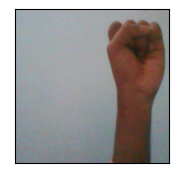

1/1 [==============================] - 0s 109ms/step
분류 : R/ 정답 : F


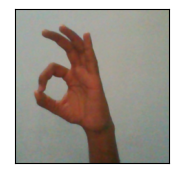

1/1 [==============================] - 0s 109ms/step
분류 : R/ 정답 : B


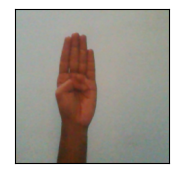

1/1 [==============================] - 0s 113ms/step
분류 : R/ 정답 : C


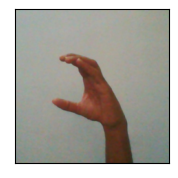

1/1 [==============================] - 0s 109ms/step
분류 : R/ 정답 : Nothing


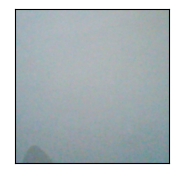

1/1 [==============================] - 0s 108ms/step
분류 : R/ 정답 : D


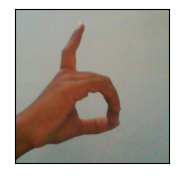

1/1 [==============================] - 0s 111ms/step
분류 : R/ 정답 : V


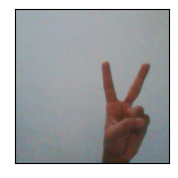

1/1 [==============================] - 0s 111ms/step
분류 : R/ 정답 : B


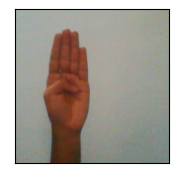

1/1 [==============================] - 0s 118ms/step
분류 : R/ 정답 : U


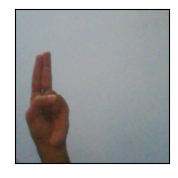

1/1 [==============================] - 0s 106ms/step
분류 : R/ 정답 : M


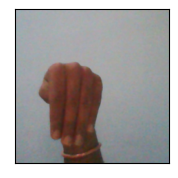

In [14]:
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]

width = 224
height = 224
channel = 3

for i in range(10, 20):
    plt.figure(figsize = (2, 2))
    
    output = model.predict(x_test[i].reshape(1, width, height, channel))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(width, height, channel), cmap = 'gray')
    
    print('분류 : ' + categories[np.argmax(output)] + '/ 정답 : ' + categories[np.argmax(t_test[i])])
    plt.show()